In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
import re
# from textblob import Textblob
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import warnings
warnings.filterwarnings("ignore")

In [172]:
all_tweets = pd.read_csv('C:\\Users\\ramku\\OneDrive\\Desktop\\stock_tweetss.csv')
all_stock = pd.read_csv('C:\\Users\\ramku\\OneDrive\\Desktop\\stock_yfinance_data.csv')

In [174]:
print(all_tweets.shape)

(80793, 4)


In [176]:
print(all_stock.shape)

(6300, 8)


In [178]:
all_stock.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA


In [180]:
all_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [182]:
df = all_tweets
print(df.shape)
df.head()

(80793, 4)


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [184]:
tweets=[]

for row in range(0, len(df.index)):
    tweets.append(' '.join(str(x) for x in df.iloc[row, 1:3]))

In [18]:
tweets[0]

'Mainstream media has done an amazing job at brainwashing people. Today at work, we were asked what companies we believe in &amp; I said @Tesla because they make the safest cars &amp; EVERYONE disagreed with me because they heard“they catch on fire &amp; the batteries cost 20k to replace” TSLA'

In [186]:
#Cleaning 

import re

clean_tweets = []

for tweet in tweets:
    clean_tweet = re.sub(r"\$", '', tweet)  # remove $
    clean_tweet = re.sub(r"\n", '', clean_tweet)    # remove \n
    # clean_tweet = re.sub(r"AMZN", '', clean_tweet)  # remove AMZN
    clean_tweets.append(clean_tweet)



In [188]:
clean_tweets[20]

'According to California rules that are now also being adopted by New York state, 69% of all new cars sold will have to be EVs by 2030. @elonmusk TSLA TSLA'

In [190]:
#Add the Clean_tweets to the df data set
df['Cleaned_tweets'] = clean_tweets

#show the new column
(df['Cleaned_tweets'].iloc[0])

'Mainstream media has done an amazing job at brainwashing people. Today at work, we were asked what companies we believe in &amp; I said @Tesla because they make the safest cars &amp; EVERYONE disagreed with me because they heard“they catch on fire &amp; the batteries cost 20k to replace” TSLA'

In [192]:
df.head(3)

,Date,Tweet,Stock Name,Company Name,Cleaned_tweets
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",Mainstream media has done an amazing job at br...
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",Tesla delivery estimates are at around 364k fr...
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3/ Even if I include 63.0M unvested RSUs as of...


In [194]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df

,Date,Tweet,Stock Name,Company Name,Cleaned_tweets
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",Mainstream media has done an amazing job at br...
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",Tesla delivery estimates are at around 364k fr...
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3/ Even if I include 63.0M unvested RSUs as of...
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.","@RealDanODowd @Tesla Stop trying to kill kids,..."
...,...,...,...,...,...
80788,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,Some of the fastest growing tech stocks on the...
80789,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,"With earnings on the horizon, here is a quick ..."
80790,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,Our record delivery results are a testimony of...
80791,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,"We delivered 10,412 Smart EVs in Sep 2021, rea..."


In [196]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a funtion to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [198]:
import pandas as pd
from textblob import TextBlob
#create two columns Subjectivity and polarity

df['Subjectivity']=df['Cleaned_tweets'].apply(getSubjectivity)
df['Polarity']=df['Cleaned_tweets'].apply(getPolarity)

In [200]:
df.head(3)

,Date,Tweet,Stock Name,Company Name,Cleaned_tweets,Subjectivity,Polarity
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",Mainstream media has done an amazing job at br...,0.900000,0.600000
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",Tesla delivery estimates are at around 364k fr...,0.000000,0.000000
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",3/ Even if I include 63.0M unvested RSUs as of...,0.277273,0.018182


In [203]:
#create a function to get the sentiment scores
def getSIA(text):
    sia=SentimentIntensityAnalyzer()
    sentiment=sia.polarity_scores(text)
    return sentiment

In [205]:
import nltk
nltk.download('vader_lexicon', quiet=True)  # This will attempt to download again without printing verbose output



True

In [207]:
#get sentiment scores for each day

import nltk


compound = []
neg=[]
pos=[]
neu=[]
SIA=0

for i in range(0, len(df['Cleaned_tweets'])):
    SIA= getSIA(df['Cleaned_tweets'].iloc[i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

# Add the sentiment scores to the DataFrame
df['Compound'] = compound
df['Negative'] = neg
df['Neutral'] = neu
df['Positive'] = pos

In [209]:
df.head(1)

,Date,Tweet,Stock Name,Company Name,Cleaned_tweets,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",Mainstream media has done an amazing job at br...,0.9,0.6,0.0772,0.125,0.763,0.113


In [48]:
columns_to_drop = ['Cleaned_tweets','Tweet', 'Stock Name', 'Company Name']
existing_columns = df.columns.tolist()

columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
else:
    print("Columns to drop not found in DataFrame.")


In [50]:
df.head(3)

,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2022-09-29,0.900000,0.600000,0.0772,0.125,0.763,0.113
1,2022-09-29,0.000000,0.000000,0.0000,0.000,1.000,0.000
2,2022-09-29,0.277273,0.018182,0.2960,0.000,0.952,0.048


In [52]:
# df=df.groupby([df['Date']).mean()

In [62]:
df.head()

,Date,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2022-09-29,0.900000,0.600000,0.0772,0.125,0.763,0.113
1,2022-09-29,0.000000,0.000000,0.0000,0.000,1.000,0.000
2,2022-09-29,0.277273,0.018182,0.2960,0.000,0.952,0.048
3,2022-09-29,0.433333,0.079167,-0.7568,0.268,0.598,0.134
4,2022-09-29,0.600000,-0.200000,-0.8750,0.500,0.500,0.000


In [80]:
# stock_df = all_stock[all_stock['Stock Name'] == stock_name]
stock_df['Date']=pd.to_datetime(stock_df['Date'])
stock_df['Date']= stock_df['Date'].dt.date

In [90]:
final_df = stock_df.merge(df, how="left", on="Date")
final_df = final_df.drop(columns=['Stock Name'])  # If 'Stock Name' exists in both DataFrames
print(final_df.shape)


(63676, 13)


In [92]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,0.300000,0.125000,0.5093,0.000,0.914,0.086
1,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,0.000000,0.000000,-0.1531,0.046,0.954,0.000
2,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,0.452381,0.127143,0.8593,0.000,0.821,0.179
3,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,0.541667,0.300000,0.0000,0.000,1.000,0.000
4,2021-09-30,165.800003,166.392502,163.699493,164.251999,164.251999,56848000,0.650000,0.116667,0.4019,0.000,0.920,0.080


In [94]:
final_df['Compound']

0        0.5093
1       -0.1531
2        0.8593
3        0.0000
4        0.4019
          ...  
63671    0.4019
63672    0.5574
63673    0.0000
63674    0.0000
63675    0.0000
Name: Compound, Length: 63676, dtype: float64

In [96]:
import pandas as pd

# Assuming df is your existing DataFrame with 'Compound' column and Binary_Compound already created

# Step 1: Create the Binary_Compound column (if not already created)
threshold = 0.0  # Example threshold value, adjust as per your requirement
df['Binary_Compound'] = (df['Compound'] > threshold).astype(int)

# Step 2: Drop the original 'Compound' column
df.drop(columns=['Compound'], inplace=True)

# Step 3: Rename the 'Binary_Compound' column to 'Compound' (if desired)
df.rename(columns={'Binary_Compound': 'Compound'}, inplace=True)

# Display the updated DataFrame to verify
print(df.head())  # Adjust the number to display more or fewer rows as needed



         Date  Subjectivity  Polarity  Negative  Neutral  Positive  Compound
0  2022-09-29      0.900000  0.600000     0.125    0.763     0.113         1
1  2022-09-29      0.000000  0.000000     0.000    1.000     0.000         0
2  2022-09-29      0.277273  0.018182     0.000    0.952     0.048         1
3  2022-09-29      0.433333  0.079167     0.268    0.598     0.134         0
4  2022-09-29      0.600000 -0.200000     0.500    0.500     0.000         0


In [98]:
import numpy as np  # Import NumPy

# Assuming final_df is your DataFrame
x = np.array(final_df.drop(['Compound','Date'], axis=1))  # Dropping 'Compound' column and converting to NumPy array
y = np.array(final_df['Compound'])  # Selecting only the 'Compound' column and converting to NumPy array


In [100]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined as NumPy arrays
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## LinearDiscriminantAnalysis

In [228]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Fit Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis().fit(x_train, y_train_encoded)

# Make predictions
predictions = model.predict(x_test)

# Print classification report
print(classification_report(y_test_encoded, predictions))



              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.75      0.60      0.67         5
           2       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.74      0.72      0.72        20
weighted avg       0.74      0.75      0.74        20



### Compute ROC curve and ROC area for each class

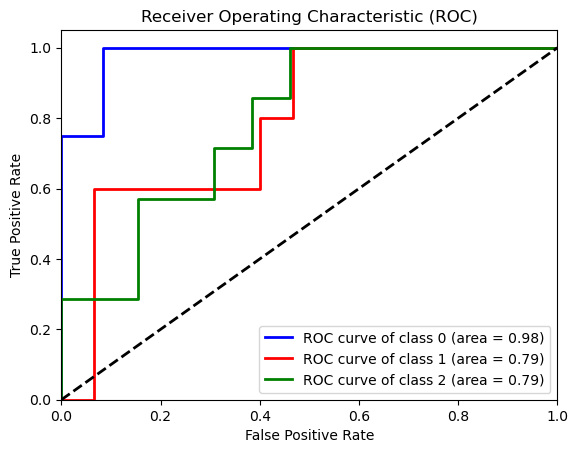

In [231]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(encoder.classes_)  # Number of classes from LabelEncoder

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, model.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## LogisticRegression

In [234]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the number of unique classes and samples
n_samples = x_train.shape[0]
n_classes = len(np.unique(y_train_encoded))

print("Number of samples:", n_samples)
print("Number of classes:", n_classes)

if n_samples <= n_classes:
    raise ValueError("The number of samples must be more than the number of classes. Please check your dataset.")

# Fit Logistic Regression model
model = LogisticRegression().fit(x_train, y_train_encoded)

# Make predictions
predictions = model.predict(x_test)

# Print classification report
print(classification_report(y_test_encoded, predictions))


Number of samples: 80
Number of classes: 3
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.75      0.60      0.67         5
           2       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.74      0.72      0.72        20
weighted avg       0.74      0.75      0.74        20



### Compute ROC curve and ROC area for each class

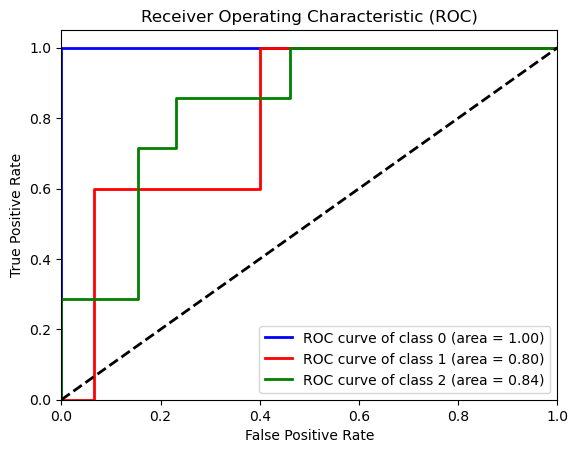

In [237]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(encoder.classes_)  # Number of classes from LabelEncoder

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded == i, model.predict_proba(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## SVM

Number of samples: 80
Number of classes: 3
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.60      0.60      0.60         5
           2       0.60      0.43      0.50         7

    accuracy                           0.70        20
   macro avg       0.67      0.68      0.66        20
weighted avg       0.68      0.70      0.68        20



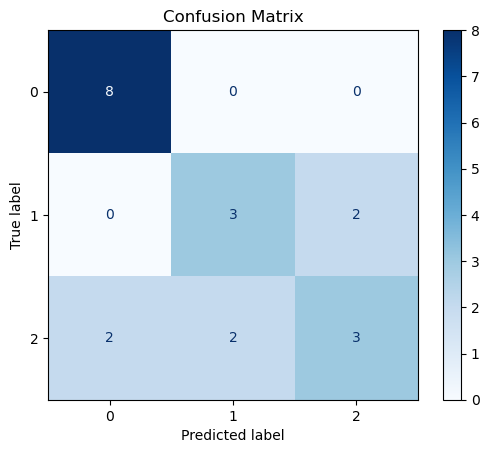

In [239]:

from sklearn.svm import SVC



# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels (if necessary)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the number of unique classes and samples
n_samples = x_train.shape[0]
n_classes = len(np.unique(y_train_encoded))

print("Number of samples:", n_samples)
print("Number of classes:", n_classes)

if n_samples <= n_classes:
    raise ValueError("The number of samples must be more than the number of classes. Please check your dataset.")

# Binarize the output for ROC curve
y_train_binarized = label_binarize(y_train_encoded, classes=np.arange(n_classes))
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes))

# Fit SVM model with probability estimates
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
classifier.fit(x_train, y_train_binarized)

# Make predictions
y_score = classifier.decision_function(x_test)
predictions = classifier.predict(x_test)

# Convert predictions to class labels
predictions_class = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test_encoded, predictions_class))

# Compute confusion matrix
matrix = confusion_matrix(y_test_encoded, predictions_class)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=encoder.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



### Compute ROC curve and ROC area for each class

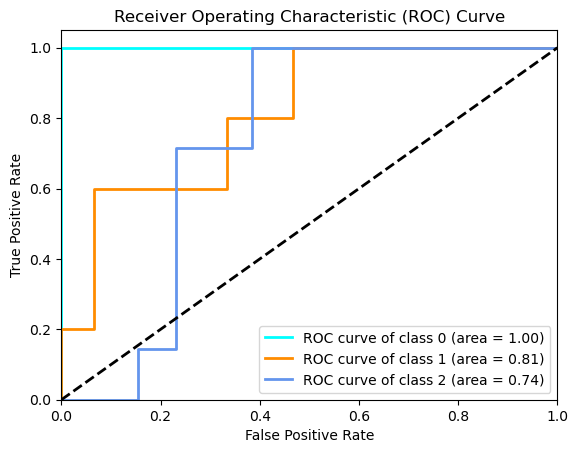

In [242]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## RandomForest Classifier

Number of samples: 80
Number of classes: 3
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.60      0.60      0.60         5
           2       0.71      0.71      0.71         7

    accuracy                           0.75        20
   macro avg       0.73      0.73      0.73        20
weighted avg       0.75      0.75      0.75        20



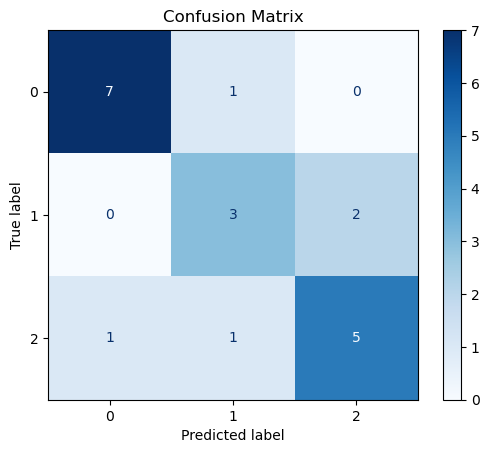

In [244]:

from sklearn.ensemble import RandomForestClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=15, n_informative=5, n_classes=3, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the labels (if necessary)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the number of unique classes and samples
n_samples = x_train.shape[0]
n_classes = len(np.unique(y_train_encoded))

print("Number of samples:", n_samples)
print("Number of classes:", n_classes)

if n_samples <= n_classes:
    raise ValueError("The number of samples must be more than the number of classes. Please check your dataset.")

# Fit RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train_encoded)

# Make predictions
predictions = model.predict(x_test)

# Print classification report
print(classification_report(y_test_encoded, predictions))

# Compute confusion matrix
matrix = confusion_matrix(y_test_encoded, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=encoder.classes_)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Compute ROC curve and ROC area for each class

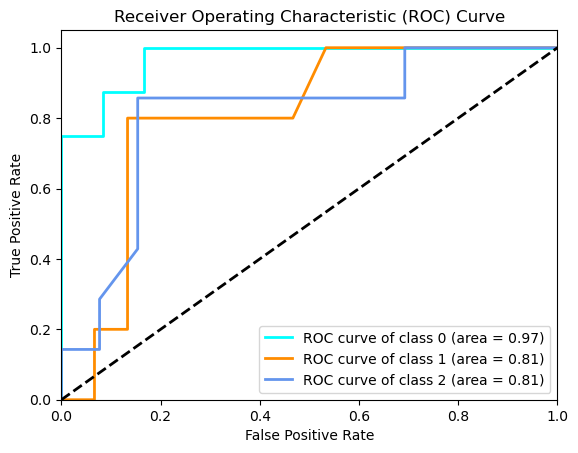

In [246]:


# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes))
y_train_binarized = label_binarize(y_train_encoded, classes=np.arange(n_classes))

# Fit the model using OneVsRestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(x_train, y_train_binarized)

# Get the decision function scores
y_score = classifier.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Sharpe Ratio,Maximum Drawdown,Win Ratio,Number of Trades Executed

Sharpe Ratio: 0.7603
Maximum Drawdown: 2.8033
Win Ratio: 0.5317
Number of Trades Executed: 100


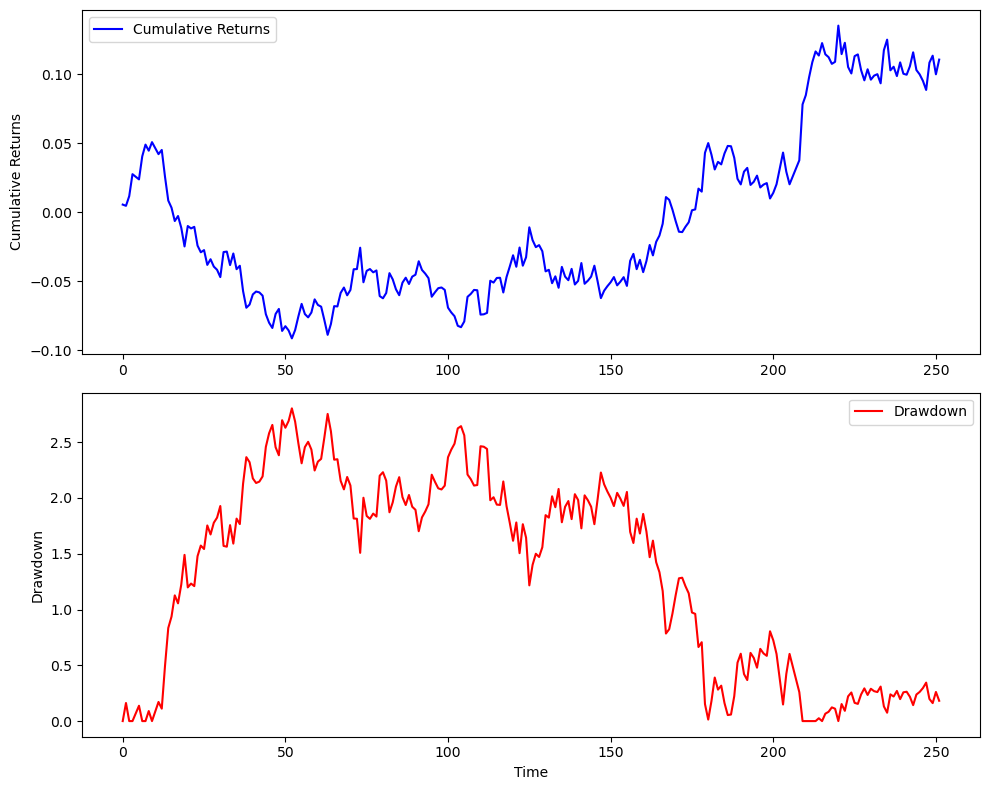

In [248]:


# Generate hypothetical daily returns (replace with actual data)
np.random.seed(42)
returns = np.random.normal(0.0005, 0.01, size=252)  # Mean return of 0.05% (annualized), std deviation of 1%

# Calculate cumulative returns
cumulative_returns = np.cumprod(1 + returns) - 1

# Calculate Sharpe ratio
daily_rf_rate = 0.0  # Daily risk-free rate (e.g., 0.0%)
sharpe_ratio = np.sqrt(252) * np.mean(returns - daily_rf_rate) / np.std(returns)

# Calculate maximum drawdown
cumulative_max = np.maximum.accumulate(cumulative_returns)
drawdown = (cumulative_max - cumulative_returns) / cumulative_max
max_drawdown = np.max(drawdown)

# Calculate win ratio
win_ratio = np.sum(returns > 0) / len(returns)

# Calculate number of trades executed (hypothetical)
num_trades = 100

# Print metrics
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Win Ratio: {win_ratio:.4f}")
print(f"Number of Trades Executed: {num_trades}")

# Plot cumulative returns and drawdown
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.plot(np.arange(len(cumulative_returns)), cumulative_returns, label='Cumulative Returns', color='blue')
ax1.set_ylabel('Cumulative Returns')
ax1.legend(loc='upper left')

ax2.plot(np.arange(len(drawdown)), drawdown, label='Drawdown', color='red')
ax2.set_ylabel('Drawdown')
ax2.set_xlabel('Time')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



# Portfolio

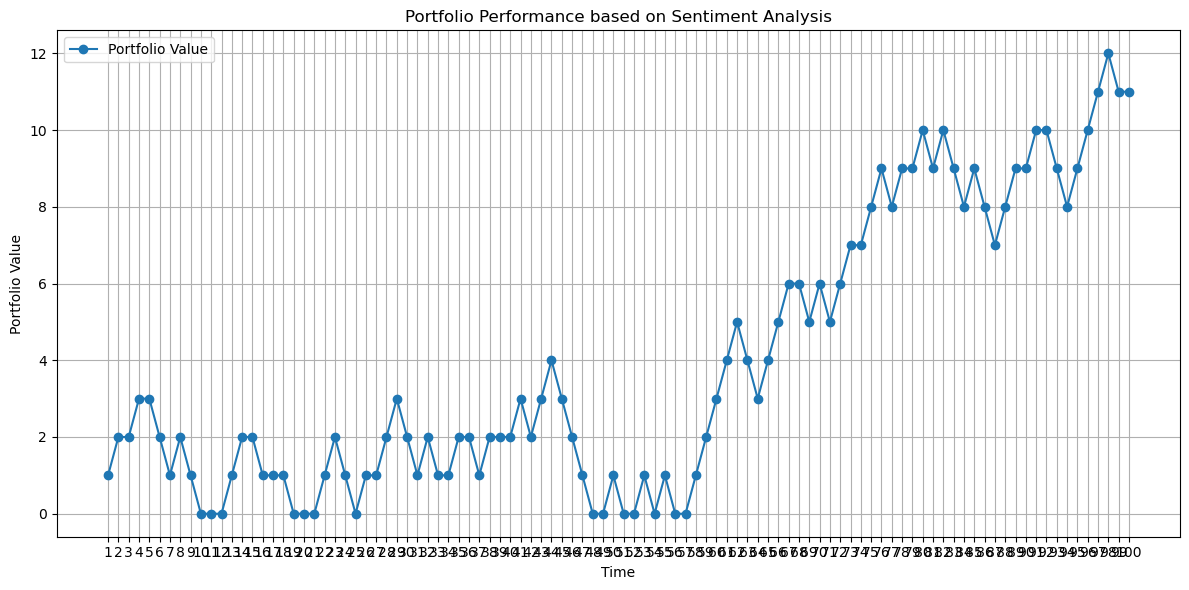

Initial Portfolio Value: 1
Final Portfolio Value: 11
Returns: 1000.00%


In [250]:


#sentiment scores (replace with actual sentiment scores from your model)
sentiment_scores = np.random.rand(100)  # Example: randomly generated sentiment scores
threshold_buy = 0.6  # Example threshold for buying
threshold_sell = 0.4  # Example threshold for selling

# Initialize portfolio
portfolio = 0
positions = []
portfolio_values = []

# Implement trading strategy based on sentiment scores
for i, sentiment_score in enumerate(sentiment_scores):
    if sentiment_score > threshold_buy:
        # Buy
        portfolio += 1
        positions.append(1)  # Record buy position (1)
    elif sentiment_score < threshold_sell:
        # Sell
        if portfolio > 0:
            portfolio -= 1
            positions.append(-1)  # Record sell position (-1)
        else:
            positions.append(0)  # No action (hold)

    # Calculate portfolio value at each time step
    portfolio_values.append(portfolio)

# Convert portfolio values to numpy array for plotting
portfolio_values = np.array(portfolio_values)

# Calculate returns
initial_value = portfolio_values[0]
final_value = portfolio_values[-1]
returns = (final_value - initial_value) / initial_value * 100

# Plot portfolio values and trading positions
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values, label='Portfolio Value', marker='o')
plt.title('Portfolio Performance based on Sentiment Analysis')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.xticks(ticks=np.arange(len(sentiment_scores)), labels=np.arange(len(sentiment_scores))+1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Initial Portfolio Value: {initial_value}")
print(f"Final Portfolio Value: {final_value}")
print(f"Returns: {returns:.2f}%")
